In [1]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions
import matplotlib.pyplot as plt
%matplotlib inline

### Prepare dataset

Text(0,0.5,'y')

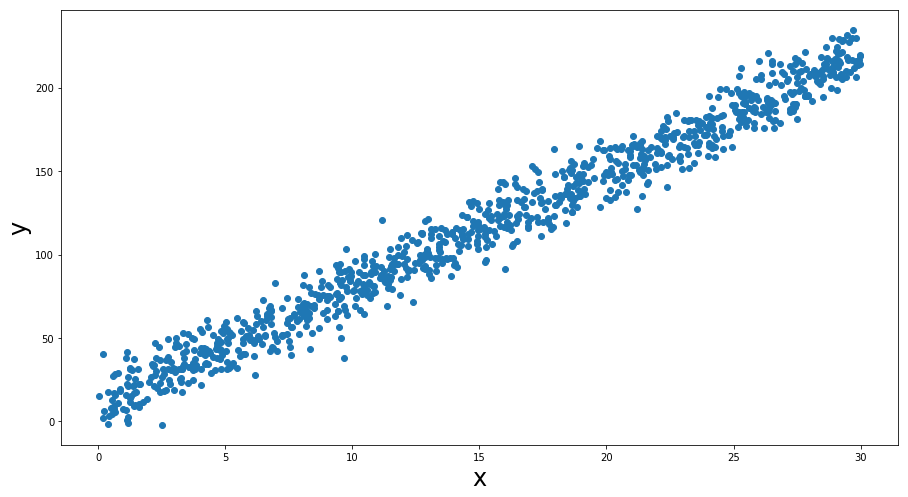

In [2]:
plt.figure(figsize=(15,8))
x = 30 * np.random.rand(1000).astype(np.float32)
y = 7 * x + 10
y += 10 * np.random.randn(1000).astype(np.float32)

plt.scatter(x,y)
plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)

### Create linear regression network as a subclass of Chain

In [3]:
class LinearRegression(Chain):
    def __init__(self):
        super(LinearRegression, self).__init__()
        with self.init_scope():
                self.l1 = L.Linear(1,1)

    def __call__(self, x):
        return self.l1(x)

### Select an optimization algorithm

In [4]:
model = LinearRegression()

# Set x and y as chainer variables
x_var = Variable(x.reshape(1000, -1))
y_var = Variable(y.reshape(1000, -1))

# Setup the optimizer.
optimizer = optimizers.MomentumSGD(lr = 0.001)
optimizer.setup(model)

### Training loop

In [5]:
# Define a training loop
def linear_train(train_data, train_target, n_epochs = 200):
    
    for _ in range(n_epochs):
        # Get the result of the forward pass    
        output = model(train_data)

        # Calculate the loss between the training data and target data
        loss = F.mean_squared_error(train_target,output)

        # Note that gradients are accumulated by the method rather than overwritten. 
        # So first you must clear gradients to renew the computation. 
        # It can be done by calling the cleargrads() method.
        model.cleargrads()

        # Calculate and update all gradients.
        loss.backward()

        # Use the optmizer to move all parameters of the network
        # to values that will reduce the loss. 
        optimizer.update()

### Visuallize the training process

Text(0,0.5,'y')

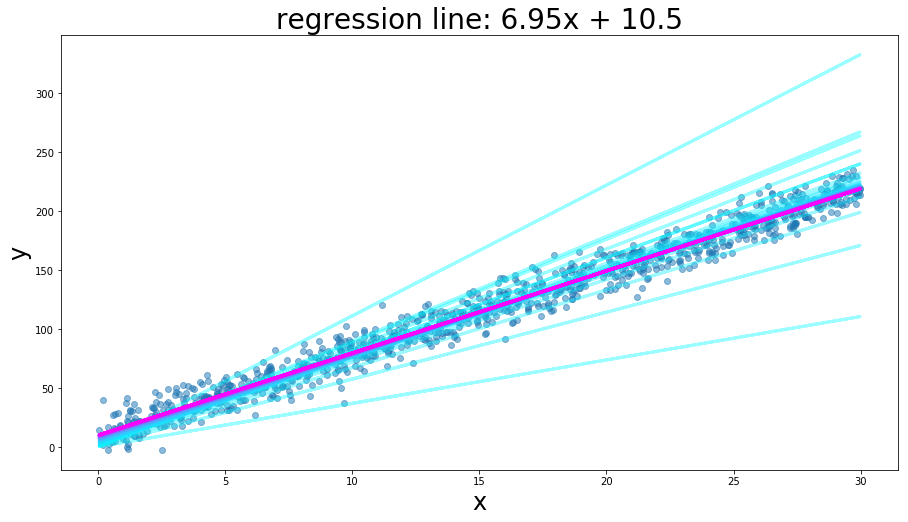

In [6]:
plt.figure(figsize=(15,8))
plt.scatter(x,y, alpha =0.5)

for i in range(150):    
    linear_train(x_var, y_var, n_epochs=5)
    y_pred = model(x_var).data
    plt.plot(x, y_pred, color=plt.cm.cool(i/150.), alpha = 0.4, lw =3)
    
    
slope = model.l1.W.data[0,0]
intercept = model.l1.b.data[0]
plt.title("regression line: {0:.3}x + {1:.3}".format(slope, intercept), fontsize=28)
plt.xlabel("x", fontsize=24)
plt.ylabel("y", fontsize=24)